In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv('medical_examination.csv')

In [8]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [9]:
def calculate_overweight(row):
    bmi = row['weight']/(row['height']/100)**2
    if bmi>25:
        return 1
    else:
        return 0


In [10]:
df['overweight'] = df.apply(lambda row: calculate_overweight(row),axis=1)

In [11]:
df['cholesterol']= df['cholesterol'].apply(lambda x: 1 if x>1 else 0 )

In [12]:
df['gluc'] = df['gluc'].apply(lambda x: 1 if x>1 else 0)

In [12]:
# split dataframe
df_with_cardio =  df[df['cardio']==1]
df_without_cardio = df[df['cardio']==0]

In [13]:
df_long = pd.melt(df,  id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

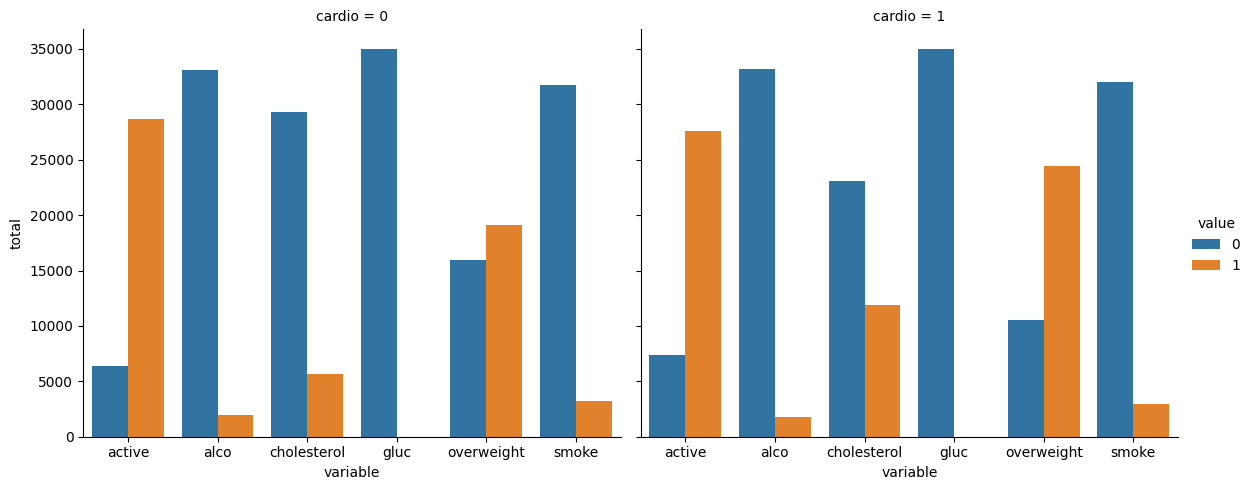

In [15]:
g = sns.catplot(x='variable', hue='value', col='cardio', data=df_long, kind='count', height=5, aspect=1.2)
g.set_axis_labels("variable", "total")
g.set_titles("cardio = {col_name}")
# Show the plot
plt.show()

In [16]:
df_long # cardio represents (present and not present), variable represents attributes of each patient , value represents value of each variable.

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [32]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [13]:
# Filtering the data
df = df[df['ap_lo'] <= df['ap_hi']]

In [14]:
# filtering 2.5% of higher and lower of height and weight
filtered_df = df[df['height']>=df['height'].quantile(0.025)] # return the 2.5th percentile lowest value 
filtered_df = filtered_df[filtered_df['height']<=filtered_df['height'].quantile(0.975)] # return the 97.5th percentile highest value
filtered_df = filtered_df[filtered_df['weight']>=filtered_df['weight'].quantile(0.025)]
filtered_df = filtered_df[filtered_df['weight']<=filtered_df['weight'].quantile(0.975)]

In [15]:
filtered_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [12]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [ ]:
ax = sns.heatmap(filtered_df,annot=True, cmap='coolwarm', linewidths=0.5,linecolor='black')

In [37]:
(2.5/100) * 68766 *4

6876.6

In [39]:
68766-(1698*4)

61974

In [41]:
5982/4

1495.5

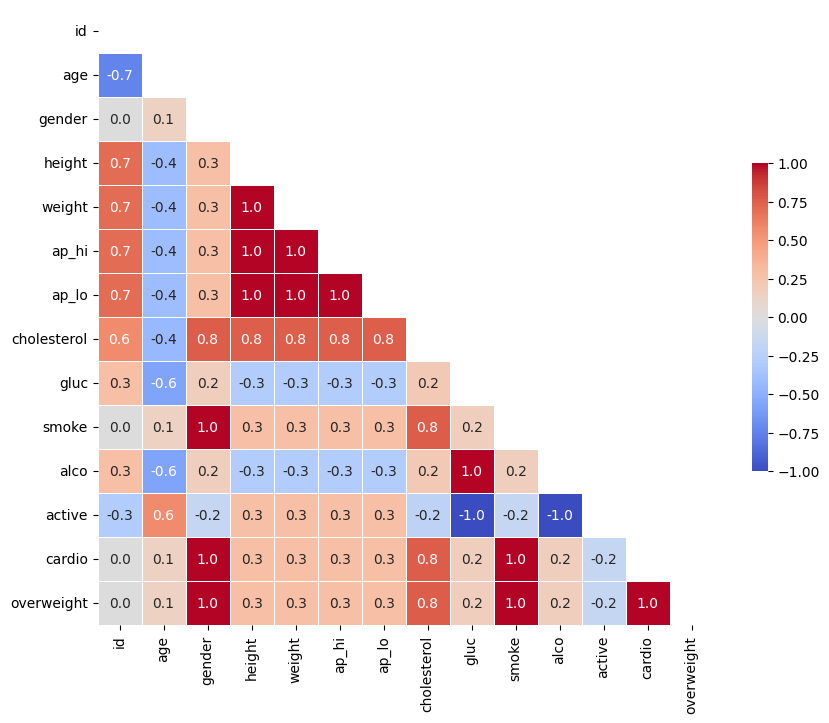

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'id': [1, 2, 3, 4, 5],
    'age': [50, 60, 45, 35, 40],
    'gender': [1, 2, 1, 2, 1],
    'height': [165, 170, 160, 175, 180],
    'weight': [65, 70, 60, 75, 80],
    'ap_hi': [120, 130, 110, 140, 150],
    'ap_lo': [80, 85, 75, 90, 95],
    'cholesterol': [1, 2, 1, 3, 2],
    'gluc': [1, 1, 2, 2, 1],
    'smoke': [0, 1, 0, 1, 0],
    'alco': [0, 0, 1, 1, 0],
    'active': [1, 1, 0, 0, 1],
    'cardio': [0, 1, 0, 1, 0],
    'overweight': [0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

# Compute the correlation matrix
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Show the plot
plt.show()


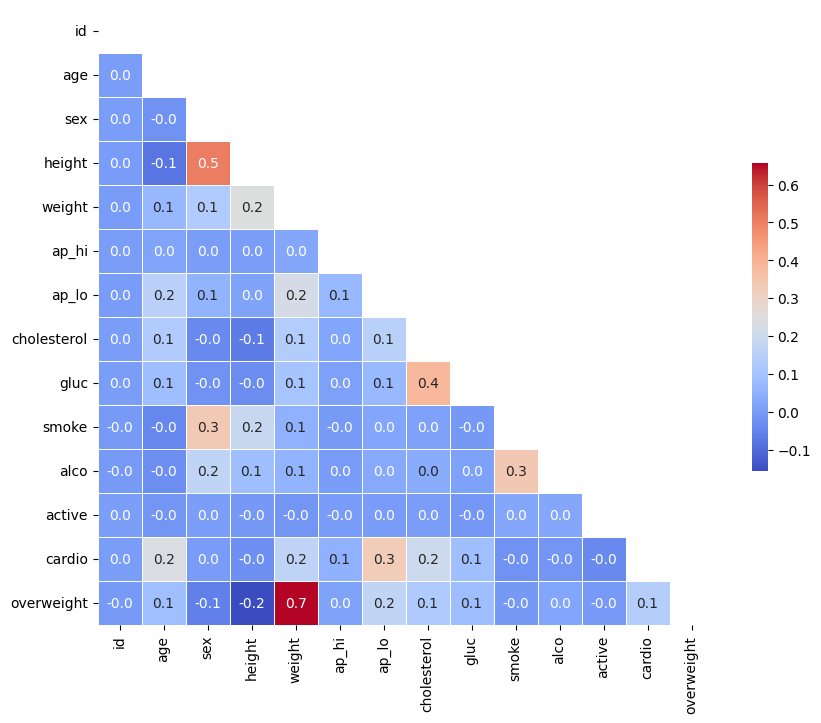

In [16]:
corr = filtered_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Show the plot
plt.show()